# Introduction
There are two ways to define parametric families for the one-row Gomory-Johnson model: either locally (about a point) or as a parametric family. This tutorial will address how to construct both in the ` cutgeneratingfunctionology` package. This serves as an extension to the standard tutorial. 

## Local Families

To define a function locally, we use an instance of `ParametricRealField` to define local variables along with default methods for constructing functions within the one-row Gomory-Johnson model. When creating an instance of the `ParametricRealField`, variable names and a test point must be provided.

In [27]:
import cutgeneratingfunctionology.igp as igp; from cutgeneratingfunctionology.igp import *
# %display latex #uncomment for nice latex
K.<f> =  ParametricRealField([4/5])

The software records comparisons of variables within the `ParametricRealField` object. 

In [28]:
local_gmic = piecewise_function_from_breakpoints_and_values([0,f,1],[0,1,0])

In [29]:
minimality_test(local_gmic)

True

Access information recorded in the `ParametricRealField` by defining a proof cell. 

In [30]:
local_gmic_proof_cell = K.make_proof_cell()
local_gmic_proof_cell.get_ineqs()

[f - 1 < 0, -2*f + 1 < 0]

We can see that our test point can be used for a proof cell defined by $\frac{1}{2}<f<1$. 

The data within `ParametricRealField` is mutable. A `proof_cell` is not. Proof cells are like a snapshot of the comparisons recorded in the real parametric field 

In [31]:
f>2/3 # additional comparisons are recorded in K

True

In [32]:
K_is_mutable = K.make_proof_cell()
K_is_mutable.get_ineqs()

[f - 1 < 0, -3*f + 2 < 0]

In [33]:
local_gmic_proof_cell.get_ineqs()

[f - 1 < 0, -2*f + 1 < 0]

Each proof cell knows what basic semialgebraic set it has been constructed with.  

In [34]:
local_gmic_proof_cell.bsa

BasicSemialgebraicSet_veronese(BasicSemialgebraicSet_polyhedral_ppl_NNC_Polyhedron(Constraint_System {-x0+1>0, 2*x0-1>0}, names=[x0]), polynomial_map=[f])

Local definitions cannot define more than a single proof cell. To define and compute a proof complex, one needs write code that is compatible as with a given parametrization of functions in the Gomory Johnson one row model. 

## Parametric Families

The class `ParametricFamily` can, through introspection, deduce properties of an example function to define a general class of functions with similar properties. We can utilize this class to define a parametric family of functions, which is how functions are defined in the Electronic Compendium. The parametric framework is employed to capture families of functions with a fixed set of parameters for their description.  Assumptions about the parametric family should be written into the `_construct_function` method. 

In [9]:
class gmic_example_family(ParametricFamily):
    """Example use example of ParametricFamily"""
    def _construct_function(self, f=4/5, field=None):
        if not bool(0 < f < 1):
            raise ValueError("Bad parameters. Unable to construct the function.")
        gmi_bkpt = [0,f,1]
        gmi_values = [0,1,0]
        h = piecewise_function_from_breakpoints_and_values(gmi_bkpt, gmi_values, field=field)
        return h

The only method that needs to be defined for a class that inherits from the `ParametricFamily` is the `_construct_function` method. Once this method is defined, the class can be used to define an abstract function, similar to the example function provided, using the same parameters. It's important to assign a global name to the class within the environment's namespace.

In [10]:
parametric_gmic = gmic_example_family()

In [11]:
h = parametric_gmic(1/3)
extremality_test(h, False)

INFO: 2023-09-20 08:58:03,893 Rational case.
INFO: 2023-09-20 08:58:03,895 pi(0) = 0
INFO: 2023-09-20 08:58:03,896 pi is subadditive.
INFO: 2023-09-20 08:58:03,897 pi is symmetric.
INFO: 2023-09-20 08:58:03,897 Thus pi is minimal.
INFO: 2023-09-20 08:58:03,897 Gomory-Johnson's 2-slope theorem applies. The function is extreme.  Continuing anyway because full_certificates=True.
INFO: 2023-09-20 08:58:03,898 Computing maximal additive faces...
INFO: 2023-09-20 08:58:03,899 Computing maximal additive faces... done
INFO: 2023-09-20 08:58:03,902 Completing 0 functional directed moves and 2 covered components...
INFO: 2023-09-20 08:58:03,902 Completion finished.  Found 0 directed moves and 2 covered components.
INFO: 2023-09-20 08:58:03,903 All intervals are covered (or connected-to-covered). 2 components.
INFO: 2023-09-20 08:58:03,928 Finite dimensional test: Solution space has dimension 0.
INFO: 2023-09-20 08:58:03,929 Thus the function is extreme.


True

Combining a parametric family with `SemialegbraicComplex` allows for computation of proof complexes. To compute a proof complex, one can use either the `bfs_completation` or `shooting_points` methods corresponding to a breath first search or testing random points within the defined parameter space.

In [12]:
example_clx = SemialgebraicComplex(parametric_gmic, var_name=['f'])
logging.disable(logging.INFO)             # Suppress output in automatic tests.
logging.disable(logging.WARNING)          # Suppress warnings in automatic tests. 
example_clx.bfs_completion(goto_lower_dim=True) 

The proof complex knows about the proof cells which defines it and the point used to define it. 

In [13]:
example_clx.components

[SemialgebraicComplexComponent(var_value=(127424493/552078001,), region_type=is_extreme, polyhedral, 0 eqs, 2 strict-ins, 0 nonstrict-ins),
 SemialgebraicComplexComponent(var_value=(101/200,), region_type=is_extreme, polyhedral, 0 eqs, 2 strict-ins, 0 nonstrict-ins),
 SemialgebraicComplexComponent(var_value=(-1/100,), region_type=not_constructible, polyhedral, 0 eqs, 1 strict-ins, 0 nonstrict-ins),
 SemialgebraicComplexComponent(var_value=(101/100,), region_type=not_constructible, polyhedral, 0 eqs, 1 strict-ins, 0 nonstrict-ins),
 SemialgebraicComplexComponent(var_value=(1/2,), region_type=is_extreme, polyhedral, 1 eqs, 0 strict-ins, 0 nonstrict-ins),
 SemialgebraicComplexComponent(var_value=(0,), region_type=not_constructible, polyhedral, 1 eqs, 0 strict-ins, 0 nonstrict-ins),
 SemialgebraicComplexComponent(var_value=(1,), region_type=not_constructible, polyhedral, 1 eqs, 0 strict-ins, 0 nonstrict-ins)]

Each `SemialgebraicComplexComponent` is a proof cell and data can be accessed similarly to the local case. 

In [14]:
first_found_cell = example_clx.components[0]
first_found_cell.get_ineqs()

[2*f - 1 < 0, -f < 0]

We can collect cells of different region types into an single complex.  The extreme cells cover $(0,1)$ as expected for the GMIC function. 

In [15]:
extreme_cells = example_clx.subcomplex_of_cells_with_given_region_types(given_region_types={'is_extreme'})
for cell in extreme_cells.components:
    print(cell.get_ineqs()) 

[2*f - 1 < 0, -f < 0]
[f - 1 < 0, -2*f + 1 < 0]
[2*f - 1 == 0]


The option `goto_lower_dim` is used to find lower dimensional faces within the proof complex. With this option set to `False` only full dimensional faces of the complex are found. 

In [16]:
no_lower_dim_faces_complex = SemialgebraicComplex(parametric_gmic, var_name=['f'])
no_lower_dim_faces_complex.bfs_completion(goto_lower_dim=False)
len(no_lower_dim_faces_complex.components)

4

In [17]:
len(example_clx.components)

7

We also can organize by region type into it's own subcomplex.

In [18]:
example_clx.subcomplexes_of_cells_with_given_region_types()

{'not_constructible': SemialgebraicComplex with 4 components,
 'is_extreme': SemialgebraicComplex with 3 components}

2d plotting of a complex is possible with color coding based on region types. An example from Toward Computer Assisted... page 10 using the parametric family `gj_forward_3_slope`. The color coding is as follows:
- white: not constructible functions
- yellow: constructible but not minimal
- green: minimal but not extreme
- blue: extreme   

/home/acadia/sage/src/sage/plot/contour_plot.py:206: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


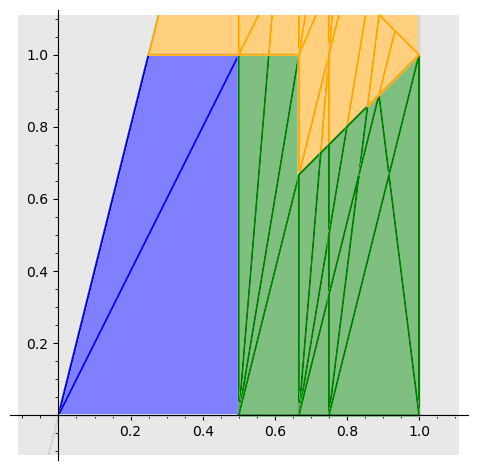

In [19]:
plotting_complex = SemialgebraicComplex(gj_forward_3_slope)
plotting_complex.bfs_completion(goto_lower_dim=False) #long time
plotting_complex.plot(slice_value=[4/5, None, None], goto_lower_dim=False)

2d plotting is <i>not</i> fully supported or tested in the software. Plots can be animated by setting `animated=True`. This creates an animated plot of the slice plotting the highest dimensional cells first, then lower dimensional cell last. 

/home/acadia/sage/src/sage/plot/contour_plot.py:206: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


Animation with 41 frames
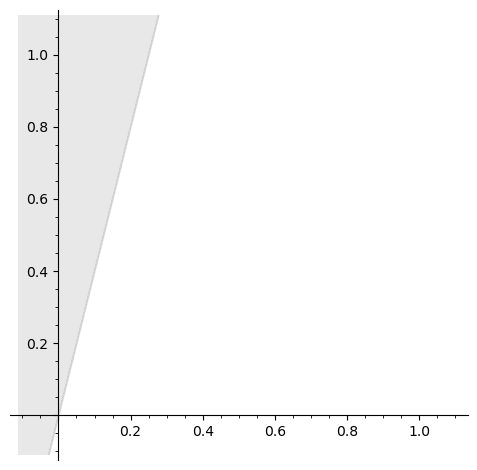

In [20]:
plotting_complex.plot(slice_value=[4/5, None, None], goto_lower_dim=False, animated=True) # long time

Functions within the Electronic Compendium know about claimed properties within the literature. The option `conditioncheck` is used to enforce these conditions. The docstring has a record of relevant information with respect to a given function. 

In [21]:
gj_forward_3_slope?

Call signature: gj_forward_3_slope(*args, **kwds)
Type:           ParametricFamily_gj_forward_3_slope
String form:    ParametricFamily_gj_forward_3_slope(default_values=(('f', 4/5), ('lambda_1', 4/9), ('lambda_2', 2/3), ('field', None), ('conditioncheck', True)), names=('f', 'lambda_1', 'lambda_2'))
File:           ~/sage/cutgeneratingfunctionology/cutgeneratingfunctionology/igp/__init__.py
Docstring:     
   Summary:
      * Name: Gomory--Johnson' Forward 3-Slope;

      * Infinite (or Finite); Dim = 1; Slopes = 3; Continuous;
        Analysis of subadditive polytope method;

      * Discovered [61] p.359, Construction.3, Fig.8;

      * Proven extreme [61] p.359, thm.8.

      * gj_forward_3_slope is a facet.

   Parameters:
      * f (real) \in (0,1);

      * lambda_1, lambda_2 (real) \in (0,1).

   Function is known to be extreme under the conditions:
      * 0 <= lambda_1 <= 1/2;

      * 0 <= lambda_2 <= 1  (in literature).

   Note:
      Since the domain and range are in [0,1]

`SemialgebraicComplex` by default find extreme functions in the Gomory Johnson one row model and classifies functions as one of the following: extreme, minimal but not extreme, constructible  but not minimal, and not constructible. To modify the behavior can adjust the behavior of the `find_region_type` parameter that is passed into the `SemialgebraicComplex` object upon construction. 

To classify functions as minimal, constructible  but not minimal, and not constructible set `find_region_type` to `functools.partial(find_region_type_igp, region_level='minimal')`

To classify functions as constructible and not constructible set `find_region_type` to `functools.partial(find_region_type_igp, region_level='constructible')`

In [22]:
import functools
minimality_test_only_complex = SemialgebraicComplex(gj_forward_3_slope, find_region_type=functools.partial(find_region_type_igp, region_level='minimal'))
minimality_test_only_complex.bfs_completion(goto_lower_dim=True) #long time
minimal_only_cells=minimality_test_only_complex.subcomplex_of_cells_with_given_region_types('is_minimal')
minimal_only_cells

SemialgebraicComplex with 179 components

Given a proof cell for minimal functions, one may wish to test if there are extreme functions within given cell. By passing in a basic semialgebraic set to `SemialgebraicComplex` once can restrict the  boundaries of a `SemialgebraicComplex`. Proof cells know what basic semialgebraic set is associated with it. 

In [23]:
minimal_cell= minimal_only_cells.components[1]  
testing_for_extremality_in_cell = SemialgebraicComplex(gj_forward_3_slope, bddbsa=minimal_cell.bsa) #complex with boundaries defined by the minimal proof cell
testing_for_extremality_in_cell.bfs_completion(goto_lower_dim=True)
extreme_subcomplex = testing_for_extremality_in_cell.subcomplex_of_cells_with_given_region_types()
print(len(extreme_subcomplex.components), len(testing_for_extremality_in_cell.components))

2 3


In the above example we see that the minimal cell has a subset that is extreme and a subset that is just minimal. 

In [24]:
minimal_cell.get_ineqs()

[-f*lambda_1 - f*lambda_2 + 4*f + lambda_2 - 2 < 0,
 f*lambda_1 + 2*f*lambda_2 - 2*lambda_2 < 0,
 -lambda_1 + lambda_2 < 0,
 3*lambda_1 - 2 < 0,
 -2*f + 1 < 0,
 -lambda_2 < 0,
 3*f*lambda_1 + f*lambda_2 - 2*f - lambda_2 < 0]

In [25]:
extreme_subcomplex.components[0].get_ineqs()

[-f*lambda_1 - f*lambda_2 + 4*f + lambda_2 - 2 < 0,
 f*lambda_1 + 2*f*lambda_2 - 2*lambda_2 < 0,
 -lambda_1 + lambda_2 < 0,
 2*lambda_1 - 1 < 0,
 -lambda_2 < 0,
 3*f*lambda_1 + f*lambda_2 - 2*f - lambda_2 < 0,
 -2*f + 1 < 0]

In [26]:
extreme_subcomplex.components[1].get_ineqs()

[-2*f*lambda_2 + 7*f + 2*lambda_2 - 4 < 0,
 4*f*lambda_2 + f - 4*lambda_2 < 0,
 2*lambda_2 - 1 < 0,
 -lambda_2 < 0,
 -2*f + 1 < 0,
 2*lambda_1 - 1 == 0]